In [12]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import yfinance as yf
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import csv

In [13]:
# Top 10 Crypto Coin Yahoo Finance Tickers
tickers = ['BTC-USD','ETH-USD','BNB-USD','XRP-USD','SOL-USD','LUNA-USD','ADA-USD','AVAX-USD','DOT-USD','DOGE-USD']

In [14]:
# Historical Data for top 10 crypto coins 2016 - 2019
# IGNORE ERROR THIS IS BC THE CRYPTOS DIDNT EXIST AT THAT TIME
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2018, 12, 31)
 
hist_2016_2019 = pdr.get_data_yahoo(tickers, start, end)
hist_1_close = hist_2016_2019['Close']
hist_1_close.mean().hvplot.bar(title = "2016 - 2019")

/Users/Rensley/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SOL-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/Rensley/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AVAX-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/Rensley/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DOT-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


:Bars   [Symbols]   (0)

In [15]:
# Historical Data for top 10 crypto coins 2016 - Present
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2022, 5, 2)
 
hist_2016_present = pdr.get_data_yahoo(tickers, start, end)
hist_2_close = hist_2016_present['Close']
hist_2_close.dropna().mean().hvplot.bar(title="2016 - Present")

:Bars   [Symbols]   (0)

In [16]:
# Historical Data for top 10 crypto coins 2020 - Present
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2022, 5, 2)
 
hist_2020_present = pdr.get_data_yahoo(tickers, start, end)
hist_3_close = hist_2020_present['Close']
hist_3_close.dropna().mean().hvplot.bar(title = "2020 - Present")

:Bars   [Symbols]   (0)

In [10]:
# Get market cap for top 10 crypto coins 
# How do we visulaize using a pie chart?
mc_data = pdr.get_quote_yahoo(tickers)
mc = mc_data['marketCap']
mc

BTC-USD     752446865408
ETH-USD     353804484608
BNB-USD      66527387648
XRP-USD      30821771264
SOL-USD      31017883648
LUNA-USD            7422
ADA-USD      29123133440
AVAX-USD     17763784704
DOT-USD      15810907136
DOGE-USD     17854595072
Name: marketCap, dtype: int64

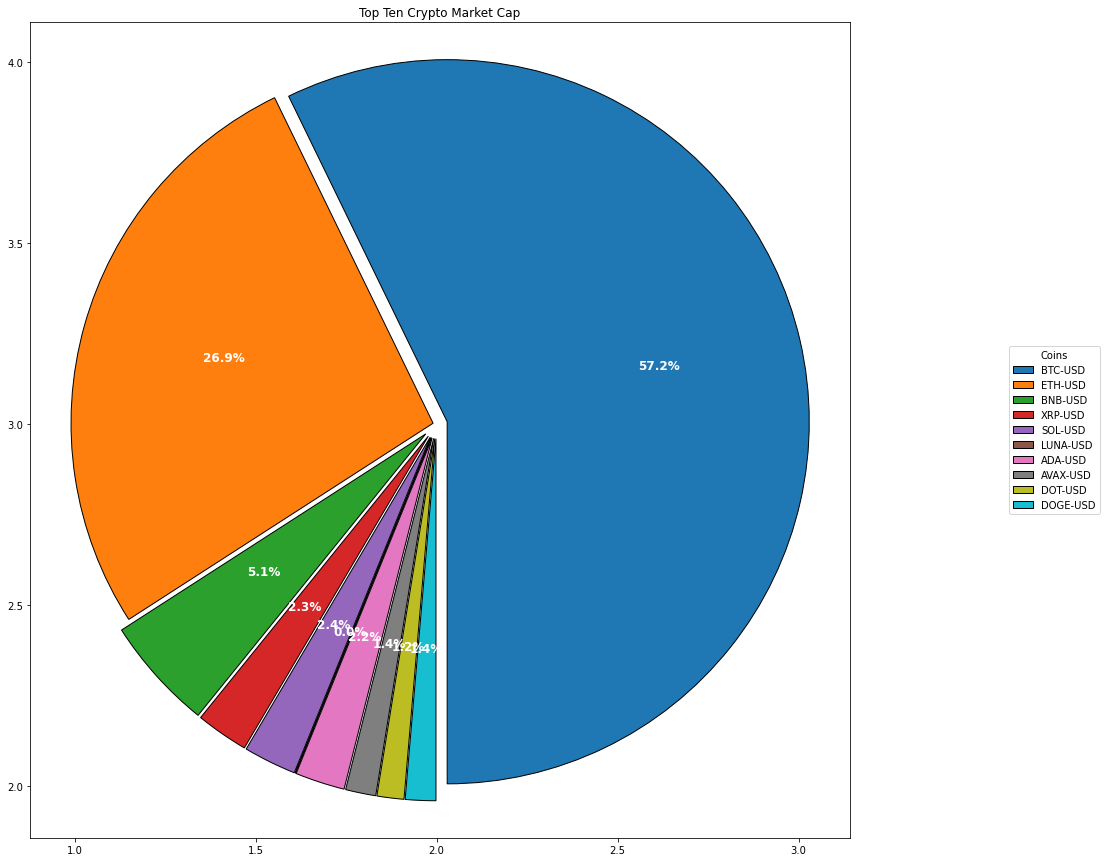

In [11]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"} # Width = 1

data = mc
tick = tickers

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts , autotexts = ax.pie(
    data, autopct=lambda pct: func(pct, data),
    textprops=dict(color="w"),
    explode = [0.03,0.01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04],
    #shadow = True,
    pctdistance = 0.6, 
    labeldistance = 1.6, 
    startangle = 270,
    radius = 1, 
    counterclock = True, 
    wedgeprops = wedgeprops,
    center=(2, 3),
    frame=True,
    #rotatelabels=True 
    )

ax.legend(wedges, tick,
          title="Coins",
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1),
          
          )

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top Ten Crypto Market Cap")

plt.show()